In [2]:
import pandas as pd
import numpy as np

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("../scripts"))))

In [4]:
from scripts.data_cleaning import treat_outliers_with_mean, clean_data_1, clean_data_2
from scripts.data_extraction import read_csv
from scripts.data_check import check_missing_value
from scripts.variablity_calculation import calculate_variability


In [5]:
data = read_csv("../data/MachineLearningRating_v3.csv")

extracting data from csv...


c:\Users\HP\Desktop\10 Acadamy\AIM  Week 3\AIM_WEEK_3\scripts\data_extraction.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(file_path)


In [6]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [8]:
print(data[['TotalPremium', 'TotalClaims']].describe())

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


In [21]:
calculate_variability(data[['TotalPremium', 'TotalClaims']].describe())

TotalPremium Variability:
  Variance: 53030.96
  Coefficient of Variation: 371.99%
  Range: 66065.18
  IQR: 21.93

TotalClaims Variability:
  Variance: 5683812.15
  Coefficient of Variation: 3675.66%
  Range: 405094.52
  IQR: 0.00



In [9]:
#Check Data Structure and Quality
print(data.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [10]:
check_missing_value(data)

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

In [11]:
print(data['LegalType'].head())  # Preview the first few rows
print(data['LegalType'].isnull().sum())  # Check for missing values

0    Close Corporation
1    Close Corporation
2    Close Corporation
3    Close Corporation
4    Close Corporation
Name: LegalType, dtype: object
0


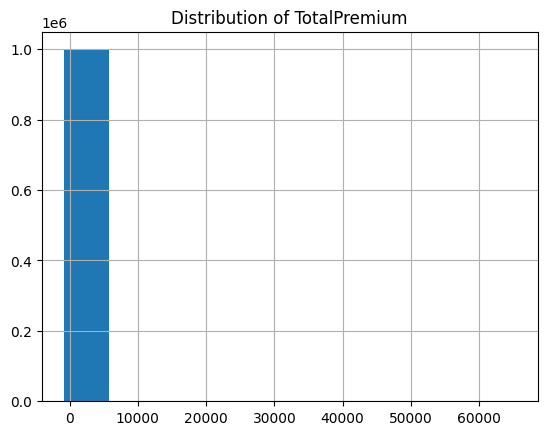

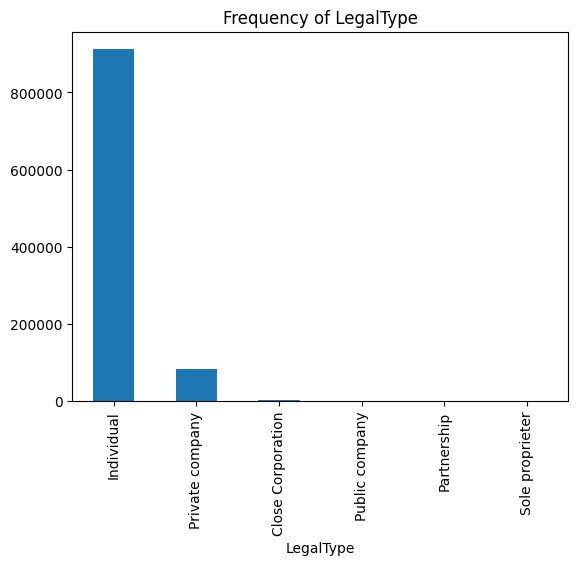

In [12]:
#Univariate Analysis
#Plot histograms and bar charts:



import matplotlib.pyplot as plt

data['TotalPremium'].hist()
plt.title('Distribution of TotalPremium')
plt.show()

data['LegalType'].value_counts().plot(kind='bar')
plt.title('Frequency of LegalType')
plt.show()

In [13]:
#Bivariate/Multivariate Analysis
#Explore correlations:
print(data[['TotalPremium', 'TotalClaims']].corr())

              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


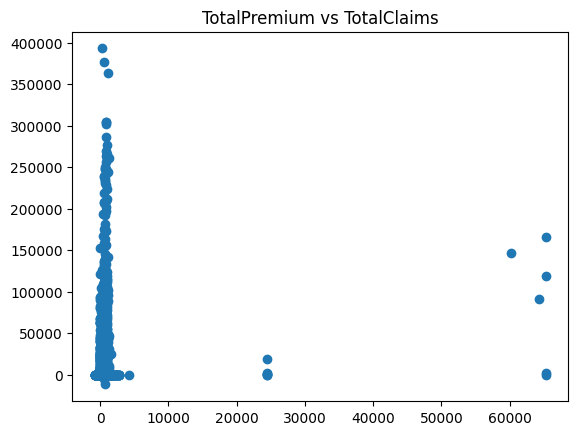

In [14]:
#Scatter plot:
plt.scatter(data['TotalPremium'], data['TotalClaims'])
plt.title('TotalPremium vs TotalClaims')
plt.show()

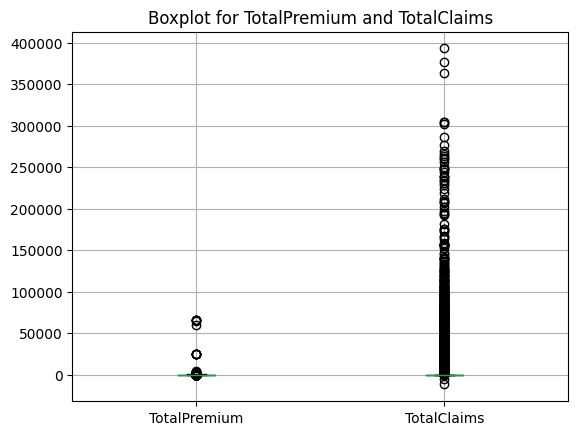

In [15]:
#Outlier Detection
data[['TotalPremium', 'TotalClaims']].boxplot()
plt.title('Boxplot for TotalPremium and TotalClaims')
plt.show()

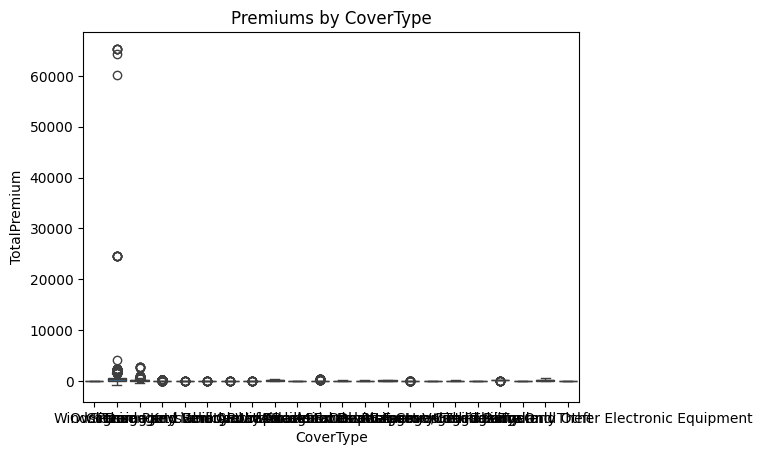

In [16]:
#Visualization
import seaborn as sns

sns.boxplot(x='CoverType', y='TotalPremium', data=data)
plt.title('Premiums by CoverType')
plt.show()